<a href="https://colab.research.google.com/github/vanillaay/Python-project/blob/main/Headlines_version_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Collection**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop

In [3]:
# loading in data

train = pd.read_csv('/content/drive/MyDrive/MNIST/train.csv')
test = pd.read_csv('/content/drive/MyDrive/MNIST/test.csv')

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
y_train = train["label"]

# Drop column with labels
x_train = train.drop(labels = ["label"],axis = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


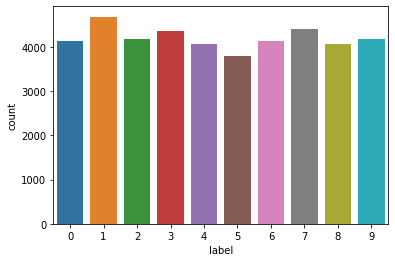

In [6]:
label_count = sns.countplot(y_train)

In [8]:
x_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [9]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

**Cleaning the data**

In [10]:
# Normalize
x_train = x_train / 255.0
test = test / 255.0

In [11]:
# Reshape
x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [12]:
# Encode
y_train = to_categorical(y_train, num_classes = 10)

In [13]:
# Split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 0)

(-0.5, 27.5, 27.5, -0.5)

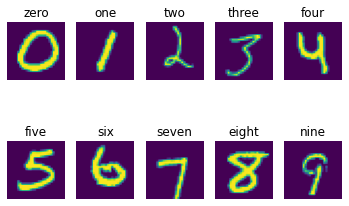

In [14]:
# example

# zero = plt.imshow(x_train[7][:,:,0])
# one = plt.imshow(x_train[23][:,:,0])
# two = plt.imshow(x_train[6][:,:,0])
# three = plt.imshow(x_train[8][:,:,0])
# four = plt.imshow(x_train[9][:,:,0])
# five = plt.imshow(x_train[10][:,:,0])
# six = plt.imshow(x_train[12][:,:,0])
# seven = plt.imshow(x_train[3][:,:,0])
# eight = plt.imshow(x_train[20][:,:,0])
# nine = plt.imshow(x_train[11][:,:,0])

#numbers = [7, 23, 6, 8, 9, 10, 12, 3, 20, 11]

fig, axs = plt.subplots(2, 5)

axs[0, 0].imshow(x_train[7][:,:,0])
axs[0, 0].set_title('zero')
axs[0, 0].axis('off')

axs[0, 1].imshow(x_train[23][:,:,0])
axs[0, 1].set_title('one')
axs[0, 1].axis('off')

axs[0, 2].imshow(x_train[6][:,:,0])
axs[0, 2].set_title('two')
axs[0, 2].axis('off')

axs[0, 3].imshow(x_train[8][:,:,0])
axs[0, 3].set_title('three')
axs[0, 3].axis('off')

axs[0, 4].imshow(x_train[9][:,:,0])
axs[0, 4].set_title('four')
axs[0, 4].axis('off')


axs[1, 0].imshow(x_train[10][:,:,0])
axs[1, 0].set_title('five')
axs[1, 0].axis('off')

axs[1, 1].imshow(x_train[12][:,:,0])
axs[1, 1].set_title('six')
axs[1, 1].axis('off')

axs[1, 2].imshow(x_train[3][:,:,0])
axs[1, 2].set_title('seven')
axs[1, 2].axis('off')

axs[1, 3].imshow(x_train[20][:,:,0])
axs[1, 3].set_title('eight')
axs[1, 3].axis('off')

axs[1, 4].imshow(x_train[11][:,:,0])
axs[1, 4].set_title('nine')
axs[1, 4].axis('off')

**Model Creation**

In [15]:
# Model
model = Sequential()

model.add(Conv2D(32, kernel_size = (5,5), activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(32, kernel_size = (5,5), activation ='relu'))
model.add(MaxPool2D(pool_size=(5,5)))

model.add(Flatten())
# !!!! breakthrough!!!
model.add(Dense(10, activation = "softmax"))

In [16]:
# Compile
model.compile(optimizer = RMSprop() , loss = "categorical_crossentropy", metrics=["accuracy"])

**Model Training**

In [17]:
history = model.fit(x_train, y_train, batch_size = 50, epochs = 3, validation_data = (x_val, y_val))

Epoch 1/3
756/756 [==============================] - 88s 115ms/step - loss: 0.4608 - accuracy: 0.8625 - val_loss: 0.0862 - val_accuracy: 0.9733
Epoch 2/3
756/756 [==============================] - 86s 114ms/step - loss: 0.0698 - accuracy: 0.9790 - val_loss: 0.0742 - val_accuracy: 0.9790
Epoch 3/3
756/756 [==============================] - 86s 114ms/step - loss: 0.0482 - accuracy: 0.9852 - val_loss: 0.0637 - val_accuracy: 0.9793


In [18]:
from skimage import io
from skimage import transform

In [27]:
#0
test_img_0 = io.imread('/content/drive/MyDrive/MNIST/0.jpg')
test_img_0 = test_img_0 / 255.0
test_img_0 = transform.resize(test_img_0, (28,28,1))
prediction_0 = model.predict(np.array ([test_img_0,]))
print(np.argmax(prediction_0))

0


In [ ]:
#2
test_img = io.imread('/content/drive/MyDrive/MNIST/two.png')
test_img = test_img / 255.0
test_img = transform.resize(test_img, (28,28,1))
prediction = model.predict(np.array ([test_img,]))
print(np.argmax(prediction))

2


In [ ]:
#8
test_img_8 = io.imread('/content/drive/MyDrive/MNIST/eight.jpg')
test_img_8 = test_img_8 / 255.0
test_img_8 = transform.resize(test_img_8, (28,28,1))
prediction_8 = model.predict(np.array ([test_img_8,]))
print(np.argmax(prediction_8))

8


In [ ]:
#9
test_img = io.imread('/content/drive/MyDrive/MNIST/9.jpg')
test_img = test_img / 255.0
test_img = transform.resize(test_img, (28,28,1))
prediction = model.predict(np.array ([test_img,]))
print(np.argmax(prediction))

8


**Confusion Matrix**

In [ ]:
len(x_val)

4200

In [20]:
from sklearn.metrics import confusion_matrix
import itertools

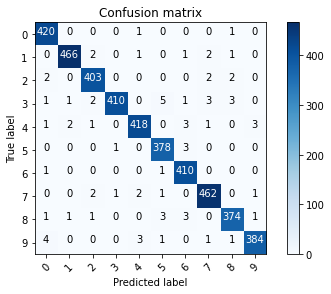

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))